<font color='red'> Applied Data Science Capstone</font>
### Best Area to Open a Restaurant in San Francisco, CA 
#### Stephen Barnes, MHSc 
##### December 2020

<font color ='Blue'> Introduction </font>

For the Coursera Capstone project, I will determine the best location for a restaurant owner\
to open a new fine dining restaurant in the city of San Francisco, CA. To do this, I will\
perform the following actions: 
 - Use neighborhood and relevant business data to determine patron frequency in the area. 
 - Use crime data to acquire neighborhood information and assist in determining which areas are safest. 
 - Use Foursquare API (application programming interface) to explore neighborhoods.
 - Use K-Means clustering and introduce the SciPy toolkit with a Dendrogram .
 - Use Folium to visualize neighborhoods and clusters in San Francisco.

<font color ='blue'>Table of Contents</font>

  1. Import Necessary Packages and Libraries & Access Foursquare
  2. Load and Analyze Data Using Foursquare API
  3. KMeans Clustering and SciPy Dendrogram
  4. Results and Discussion
    - 4A. Best Area to Open a Restaurant
    - 4B. Discussion
  5. Conclusion

### 1. Import Necessary Packages and Libraries & 
###    Access Foursquare

In [1]:
# Install necessary packages 

!pip install beautifulsoup4
!pip install requests
!pip install lxml
!conda install -c conda-forge geopy --yes
!pip install geopy
!pip install geocoder
!pip install folium
!conda install -c conda-forge folium=0.5.0 --yes
print('Packages Imported Successfully')

#Install libraries and modules

import requests # library to handle requests
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
import folium # map rendering library

print('Libraries installed successfully.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0-pyh9f0ad1d_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done
     |████████████████████████████████| 102kB 2.6MB/s ta 0:00:011
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following NEW packages will be INSTALLED:

  altair             conda-forge/noarch::altair-4.1.0-py_1
  branca             conda-forge/noarch::branca-0.4.1-py_0
  folium             conda-forge/noarch::folium-0.5.0-py_0
  pandas             conda-forge/linux-64::pandas-1.1.5-py36h2

In [2]:
# Next is to communicate with Foursquare using dev credentials
#These credentials will be removed prior to uploading but the skeleton code will remain

In [3]:
CLIENT_ID = '*********************************' # Your Foursquare ID
CLIENT_SECRET = '*********************************' # Your Foursquare Secret
# ACCESS_TOKEN = '********************************' # your FourSquare Access Token, does not need coded but only as reference
VERSION = '20180604'
LIMIT = 100
# print('Your credentails:')
# print('CLIENT_ID: ' + CLIENT_ID)
# print('CLIENT_SECRET:' + CLIENT_SECRET)
print('done')


done


### 2. Load and Analyze Data Using 
### Foursquare API

#### San Francisco Business Data

In [4]:
business = pd.read_csv('https://data.sfgov.org/api/views/g8m3-pdis/rows.csv?accessType=DOWNLOAD')
print(business.shape)
business.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(265645, 31)


,Location Id,Business Account Number,Ownership Name,DBA Name,Street Address,City,State,Source Zipcode,Business Start Date,Business End Date,Location Start Date,Location End Date,Mail Address,Mail City,Mail Zipcode,Mail State,NAICS Code,NAICS Code Description,Parking Tax,Transient Occupancy Tax,LIC Code,LIC Code Description,Supervisor District,Neighborhoods - Analysis Boundaries,Business Corridor,Business Location,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
0,1079490-06-161,2020,B & T Spray Equipment Inc,B & T Spray Equipment Inc,1911 Bay Rd,E Palo Alto,CA,94303.0,10/01/1968,06/30/2018,10/01/1968,06/30/2018,��,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0019947-01-999,19947,Parmalat Bakery Group Na,Mothers Cake & Cookie Co,99 Oakland Ca,Brisbane Q4068,NaN,0.0,10/01/1968,06/30/2018,10/01/1968,06/30/2018,��,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0024864-01-999,24864,Sf Spice Co Inc,Sf Spice Co Inc,P O Box 426 S S F,Brisbane Q4068,NaN,0.0,10/01/1968,03/04/2016,10/01/1968,03/04/2016,��,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0054014-01-999,54014,Allen Heating & Sheet Metal,Allen Heating & Sheet Metal,99 Greenbrae Ca,Brisbane Q4068,NaN,0.0,01/01/1969,03/17/2016,01/01/1969,03/17/2016,��,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0059484-01-999,59484,Mine Safety Appliances Co,Mine Safety Appliances Co,P O Box 426 Pittsburgh Pa,Brisbane Q4068,NaN,0.0,10/01/1968,03/07/2014,10/01/1968,03/07/2014,��,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
business.tail() # See the tail end of the df for good measure 

,Location Id,Business Account Number,Ownership Name,DBA Name,Street Address,City,State,Source Zipcode,Business Start Date,Business End Date,Location Start Date,Location End Date,Mail Address,Mail City,Mail Zipcode,Mail State,NAICS Code,NAICS Code Description,Parking Tax,Transient Occupancy Tax,LIC Code,LIC Code Description,Supervisor District,Neighborhoods - Analysis Boundaries,Business Corridor,Business Location,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
265640,1230014-08-191,1105092,Derek Seto,Derek,19456 Merrill Pl,Castro Valley,CA,94546.0,01/01/2019,07/01/2019,01/01/2019,07/01/2019,NaN,NaN,NaN,NaN,7220-7229,Food Services,False,False,NaN,NaN,NaN,NaN,NaN,POINT (-122.066475 37.70456),NaN,NaN,NaN,NaN,NaN
265641,1245952-02-201,1066485,Tt Bello Jv,Tt/bello Jv,650 California St 1400,San Francisco,CA,94108.0,02/16/2017,NaN,02/16/2017,NaN,301 HOWARD ST 1030 STE,San Francisco,94105,CA,5400-5499,"Professional, Scientific, and Technical Services",False,False,NaN,NaN,3.0,Chinatown,Chinatown,POINT (-122.405205 37.79294),104.0,104.0,6.0,3.0,6.0
265642,1216389-03-191,1099742,Chwan Lii Ng,Hyper Nova,1190 Mission St Apt 1622,San Francisco,CA,94103.0,03/19/2019,03/19/2019,03/19/2019,03/26/2019,NaN,NaN,NaN,NaN,5400-5499,"Professional, Scientific, and Technical Services",False,False,NaN,NaN,6.0,South of Market,Central Market,POINT (-122.413055 37.777878),32.0,32.0,5.0,10.0,34.0
265643,1191932-06-181,1089102,Jose M Recino,Recino Auto Mobile Detail Service,1180 Bowdoin St,San Fracisco,CA,94134.0,06/14/2018,06/14/2018,06/14/2018,06/14/2018,��,NaN,NaN,NaN,5600-5699,Administrative and Support Services,False,False,NaN,NaN,9.0,Portola,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265644,1220312-05-191,1101406,Fuzzy Pet Health,Fuzzy Pet Health,115 10th St,San Francisco,CA,94103.0,06/01/2016,NaN,07/01/2016,12/31/2019,115 10TH ST,San Francisco,94103,CA,5100-5199,Information,False,False,NaN,NaN,6.0,South of Market,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
business.shape

(265645, 31)

In [7]:
# Create a new df of the information we only need

business_2 = business[['Business Start Date', 'City', 'DBA Name', 'Neighborhoods - Analysis Boundaries']].copy()

# drop NaN values
business_3 = business_2.dropna()

# Change Buiness Start Date to Date/Time 
business_3['Business Start Date'] = business_3['Business Start Date'].astype('datetime64[ns]')

# Skim areas with most business in the past five years
business_4 = business_3.loc[business_3['Business Start Date'] > '2015-01-01']

# Rename Neighborhoods - Analysis Boundaries and DBA

business_4.rename(columns={'Neighborhoods - Analysis Boundaries': 'Neighborhood'}, inplace = True)
business_4.rename(columns={'DBA Name': 'Business Name'}, inplace = True)

business_4.head(20)



/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Business Start Date,City,Business Name,Neighborhood
238,2016-10-04,San Framcisco,Live Imaging,Mission
247,2018-07-16,San Franciscco,Seven Figure Shift,Chinatown
261,2019-09-18,San Francisco,Redmint One,Marina
287,2020-08-10,San Francisco,Stephany Sanchez,Oceanview/Merced/Ingleside
912,2016-08-31,Sf,D. Bross,Portola
1078,2017-05-12,San Francisco,Idex,Mission
1184,2017-11-03,San Francsico,City Best Company,Western Addition
1231,2018-02-08,San Francisco California,Talunafe Cleaning,Visitacion Valley
1366,2018-08-29,San Francisco,Concrete Remedy,Sunset/Parkside
1392,2018-10-09,San Francico,Falafelland,South of Market


In [8]:
# Looks like 'City' is unncessary. Let's go ahead and drop that 

In [9]:
business_4.drop(columns={'City'}, inplace = True)
business_4.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Business Start Date,Business Name,Neighborhood
238,2016-10-04,Live Imaging,Mission
247,2018-07-16,Seven Figure Shift,Chinatown
261,2019-09-18,Redmint One,Marina
287,2020-08-10,Stephany Sanchez,Oceanview/Merced/Ingleside
912,2016-08-31,D. Bross,Portola


In [10]:
#Count the number of businesses in each neighborhood by grouping the data
bus_5 = business_4.groupby('Neighborhood', as_index=False).count()
bus_5.reset_index()

#Drop Business Start Date
bus_5.drop(columns = 'Business Start Date',inplace = True)

#rename our "business name" column to "Businesses" 
bus_5.rename(columns={'Business Name': 'Businesses'}, inplace = True)
#and sort the data
bus_6 = bus_5.sort_values(by= ['Businesses'], ascending = False).head(15)
bus_6.reset_index(drop=True)
bus_6

,Neighborhood,Businesses
5,Financial District/South Beach,8911
18,Mission,5383
33,South of Market,4874
34,Sunset/Parkside,3372
0,Bayview Hunters Point,3254
2,Castro/Upper Market,2341
16,Marina,2281
35,Tenderloin,2161
25,Outer Richmond,2161
39,West of Twin Peaks,2003


#### Use MatPlotLib to 
#### visualize amount of businesses
#### per top 15 neighborhoods 

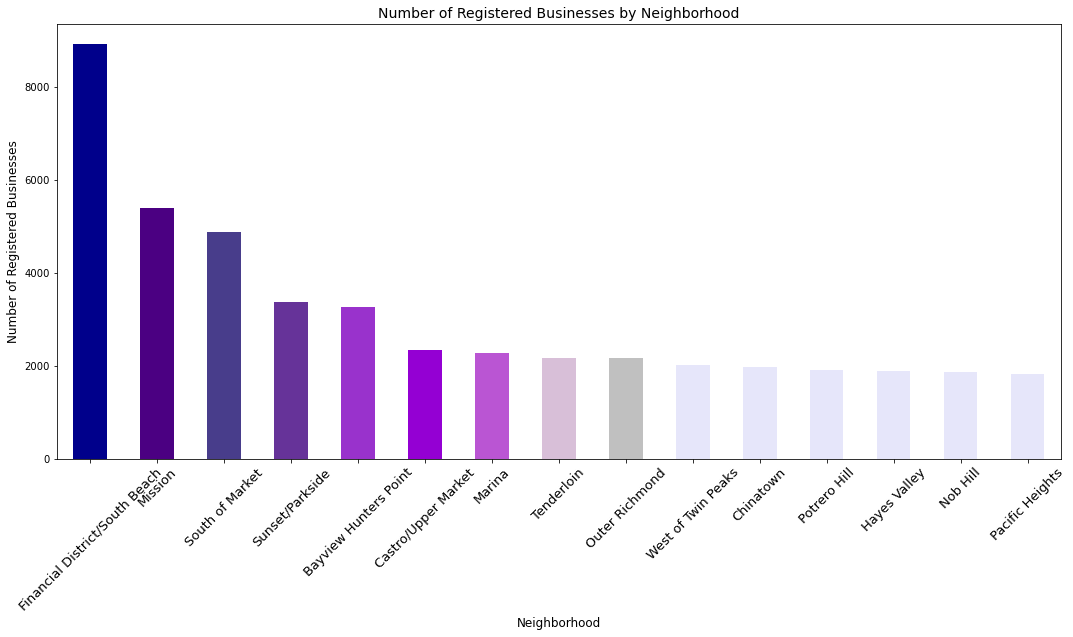

In [11]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt


bus_6.plot.bar(x = 'Neighborhood', y = 'Businesses', title = "Businesses Per Neighborhood", legend = None, rot= 45, figsize = (18, 8), color=['darkblue','indigo','darkslateblue','rebeccapurple', 'darkorchid','darkviolet','mediumorchid','thistle','silver','lavender', 'lavender', 'lavender', 'lavender', 'lavender', 'lavender'])
plt.ylabel('Number of Registered Businesses', fontsize=12)
plt.xticks(fontsize=13)
plt.xlabel('Neighborhood', fontsize=12)
plt.title('Number of Registered Businesses by Neighborhood', fontsize = 14)
plt.show()

According to the graph, the Financial District tops with nearly 9000 operating \
businesses in San Francisco. The bottom six, with the exception of \
West of Twin Peaks (2003) operate with less than 2000 businesses in those neighborhoods.

#### San Francisco Crime Data

In [12]:
# We'll take a look at most recent crime data using df.tail
crime = pd.read_csv('https://data.sfgov.org/api/views/wg3w-h783/rows.csv?accessType=DOWNLOAD')
print(crime.shape)
crime.head()

(415095, 36)


,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,point,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,HSOC Zones as of 2018-06-05,OWED Public Spaces,Central Market/Tenderloin Boundary Polygon - Updated,Parks Alliance CPSI (27+TL sites),ESNCAG - Boundary File,"Areas of Vulnerability, 2016"
0,2018/01/01 09:26:00 AM,2018/01/01,09:26,2018,Monday,2018/01/01 09:27:00 AM,61893007041,618930,171052174,173641140.0,VS,Vehicle Supplement,NaN,7041,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Auto",Open or Active,03RD ST \ HOLLISTER AVE,20471000.0,Southern,Bayview Hunters Point,10.0,37.721716,-122.395944,"(37.72171587946975, -122.39594382884452)",88.0,2.0,9.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0
1,2018/01/01 02:30:00 AM,2018/01/01,02:30,2018,Monday,2018/01/01 08:21:00 AM,61893105041,618931,180000768,180010668.0,II,Initial,NaN,5041,Burglary,Burglary - Residential,"Burglary, Residence, Forcible Entry",Open or Active,LISBON ST \ PERSIA AVE,21719000.0,Ingleside,Excelsior,11.0,37.722000,-122.433606,"(37.722000219874225, -122.43360633930074)",90.0,9.0,1.0,7.0,NaN,NaN,NaN,NaN,NaN,2.0
2,2018/01/01 10:00:00 AM,2018/01/01,10:00,2018,Monday,2018/01/01 10:20:00 AM,61893275000,618932,180000605,180010893.0,IS,Initial Supplement,NaN,75000,Missing Person,Missing Person,Found Person,Open or Active,VAN NESS AVE \ WILLOW ST,25189000.0,Northern,Tenderloin,6.0,37.783370,-122.420832,"(37.78337048750076, -122.42083185184009)",20.0,4.0,10.0,36.0,NaN,NaN,1.0,NaN,NaN,2.0
3,2018/01/01 10:03:00 AM,2018/01/01,10:03,2018,Monday,2018/01/01 10:04:00 AM,61893565015,618935,180000887,180011579.0,II,Initial,NaN,65015,Other Miscellaneous,Other,"Driving, No License Issued",Cite or Arrest Adult,BRAZIL AVE \ MISSION ST,21769000.0,Ingleside,Outer Mission,11.0,37.724683,-122.434798,"(37.72468255342173, -122.43479841474401)",NaN,9.0,1.0,28.0,NaN,NaN,NaN,NaN,NaN,1.0
4,2018/01/01 09:01:00 AM,2018/01/01,09:01,2018,Monday,2018/01/01 09:39:00 AM,61893607041,618936,171052958,180011403.0,VS,Vehicle Supplement,NaN,7041,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Auto",Open or Active,CUSTOM HOUSE PL \ JACKSON ST,24709000.0,Central,Chinatown,3.0,37.796698,-122.401294,"(37.796698028315056, -122.40129440446798)",106.0,6.0,3.0,6.0,NaN,NaN,NaN,NaN,NaN,2.0


In [13]:
crime.tail()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,point,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,HSOC Zones as of 2018-06-05,OWED Public Spaces,Central Market/Tenderloin Boundary Polygon - Updated,Parks Alliance CPSI (27+TL sites),ESNCAG - Boundary File,"Areas of Vulnerability, 2016"
415090,2020/10/18 08:00:00 AM,2020/10/18,08:00,2020,Sunday,2020/12/19 06:00:00 PM,98845871013,988458,200764682,203542295.0,VS,Vehicle Supplement,NaN,71013,Larceny Theft,Theft From Vehicle,"License Plate, Stolen",Open or Active,ARKANSAS ST \ MARIPOSA ST,23683000.0,Southern,Potrero Hill,10.0,37.763736,-122.398580,"(37.76373572668911, -122.39858041765093)",54.0,2.0,9.0,26.0,NaN,NaN,NaN,NaN,NaN,1.0
415091,2020/12/18 07:00:00 PM,2020/12/18,19:00,2020,Friday,2020/12/19 12:32:00 PM,98836407023,988364,200763913,203541258.0,VI,Vehicle Initial,NaN,7023,Motor Vehicle Theft,Motor Vehicle Theft,"Vehicle, Stolen, Motorcycle",Open or Active,12TH AVE \ BALBOA ST,27297000.0,Richmond,Inner Richmond,1.0,37.776941,-122.470433,"(37.77694147041582, -122.47043296591076)",5.0,8.0,4.0,11.0,NaN,NaN,NaN,NaN,NaN,1.0
415092,2020/12/19 12:35:00 PM,2020/12/19,12:35,2020,Saturday,2020/12/19 12:39:00 PM,98837164020,988371,200763935,203541278.0,II,Initial,NaN,64020,Non-Criminal,Other,Mental Health Detention,Open or Active,17TH ST \ CASTRO ST \ MARKET ST,25814000.0,Mission,Castro/Upper Market,8.0,37.762671,-122.435188,"(37.76267070626061, -122.4351879633321)",38.0,3.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,1.0
415093,2020/12/19 10:03:00 AM,2020/12/19,10:03,2020,Saturday,2020/12/19 12:44:00 PM,98837907020,988379,200764074,203541291.0,VI,Vehicle Initial,NaN,7020,Motor Vehicle Theft,Motor Vehicle Theft,"Vehicle, Stolen & Recovered",Open or Active,GREAT HWY \ RIVERA ST,23514000.0,Taraval,Sunset/Parkside,4.0,37.745391,-122.507443,"(37.74539143420836, -122.50744262684199)",39.0,10.0,7.0,35.0,NaN,NaN,NaN,NaN,NaN,1.0
415094,2020/12/18 05:00:00 PM,2020/12/18,17:00,2020,Friday,2020/12/18 11:57:00 PM,98825906243,988259,200763098,203533085.0,II,Initial,NaN,6243,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, $200-$950",Open or Active,HOWARD ST \ 11TH ST,24353000.0,Southern,Mission,6.0,37.773101,-122.415561,"(37.77310058698727, -122.41556139099544)",32.0,1.0,10.0,20.0,1.0,NaN,1.0,NaN,NaN,2.0


In [14]:
#take just the columns, extract relevant data, and and create a new dataframe 
crime1 = crime[['Analysis Neighborhood','Incident Category', 'Incident Date']]

#drop all null values
crime2 = crime1.dropna()

#convert incident date to datetime
crime2['Incident Date'] = crime2['Incident Date'].astype('datetime64[ns]') 

#filter to within the last 5 years
crime3 = crime2.loc[crime2['Incident Date'] > '2015-01-01']

#filter between criminal and non-criminal incidents. 
crime4 = crime3.loc[crime3['Incident Category'] != 'Non-Criminal']

#change the name of 'Analysis Neighborhood' to 'Neighborhood'
crime4.rename(columns={'Analysis Neighborhood': 'Neighborhood'}, inplace = True)

#We'll take the last 10 and preview what's going on... 
crime4.tail(10)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Neighborhood,Incident Category,Incident Date
415084,Tenderloin,Other Miscellaneous,2020-12-19
415085,Portola,Lost Property,2020-12-08
415086,Tenderloin,Drug Offense,2020-12-19
415087,Sunset/Parkside,Burglary,2020-12-18
415088,Inner Sunset,Larceny Theft,2020-12-17
415089,West of Twin Peaks,Suspicious Occ,2020-12-19
415090,Potrero Hill,Larceny Theft,2020-10-18
415091,Inner Richmond,Motor Vehicle Theft,2020-12-18
415093,Sunset/Parkside,Motor Vehicle Theft,2020-12-19
415094,Mission,Larceny Theft,2020-12-18


In [15]:

#count the number of crimes in each neighborhood
crime5 = crime4.groupby('Neighborhood', as_index=False).count()
#get rid of Incident Date
crime5.drop(columns = 'Incident Date',inplace = True)
#rename our column to reflect the counts of incidents
crime5.rename(columns={'Incident Category': 'Incidents'}, inplace = True)
#and sort our values
crime6 = crime5.sort_values(by= ['Incidents'], ascending = False)
crime7 = crime6.head(10)
crime7

,Neighborhood,Incidents
18,Mission,41420
35,Tenderloin,37479
5,Financial District/South Beach,32652
33,South of Market,31108
0,Bayview Hunters Point,22727
40,Western Addition,12161
2,Castro/Upper Market,11444
22,North Beach,11177
20,Nob Hill,10784
34,Sunset/Parkside,10682


#### Use MatPlotLib to 
#### visualize amount of crime
#### within 10 neighborhoods 

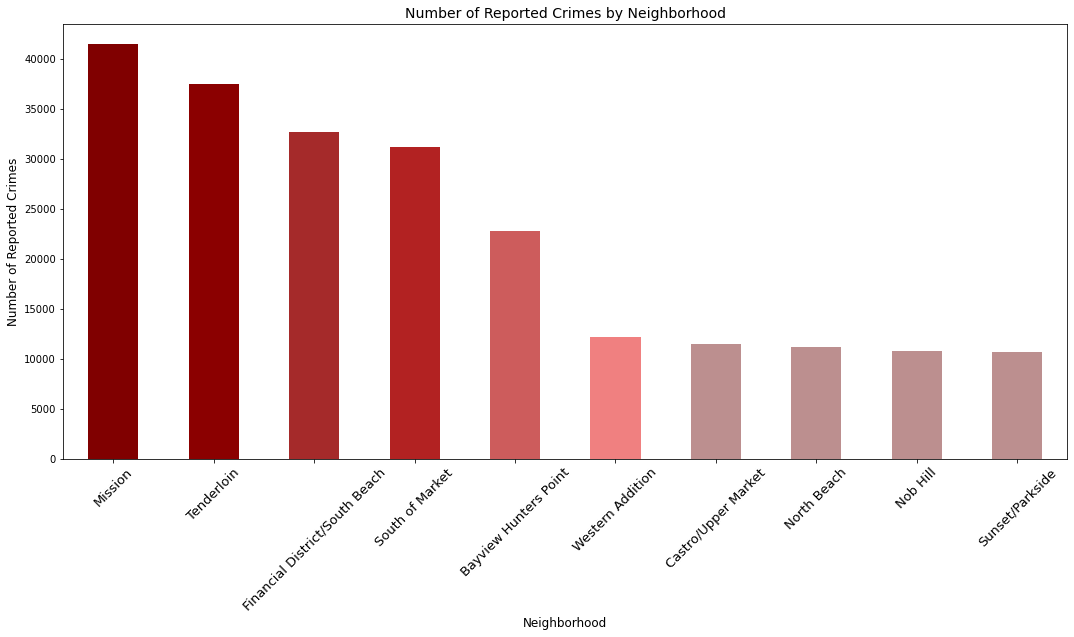

In [16]:
crime7.plot.bar(x = 'Neighborhood', y = 'Incidents', title = "Crime Incidents by Neighborhood", legend = None, rot= 45, figsize = (18, 8), color=['maroon', 'darkred', 'brown', 'firebrick', 'indianred', 'lightcoral', 'rosybrown', 'rosybrown', 'rosybrown', 'rosybrown'])
plt.ylabel('Number of Reported Crimes', fontsize=12)
plt.xticks(fontsize=13)
plt.xlabel('Neighborhood', fontsize=12)
plt.title('Number of Reported Crimes by Neighborhood', fontsize = 14)
plt.show()

Since 2018, over 40,000 non-criminal incidents have \
been reported in the 'Mission' neighborhood. The \
last 4 neighborhoods average around 10,000 incidents each. \
We'll create a new DF of the top 6. 

In [17]:
crime_8 = crime7.head(6)
crime_8

,Neighborhood,Incidents
18,Mission,41420
35,Tenderloin,37479
5,Financial District/South Beach,32652
33,South of Market,31108
0,Bayview Hunters Point,22727
40,Western Addition,12161


In [18]:
# Next, we'll merge the two datasets which were top 10 neighborhoods for business and top 5 for crime within the city.

Merge = bus_6.merge(crime_8, on=['Neighborhood'])

# Remove values common found in top 10 neighborhoods for business

SFN = bus_6[(~bus_6.Neighborhood.isin(Merge.Neighborhood))]

# What we should achieve are the top neighborhoods for business that are not the top neighborhoods for crime

SFN.head()


,Neighborhood,Businesses
34,Sunset/Parkside,3372
2,Castro/Upper Market,2341
16,Marina,2281
25,Outer Richmond,2161
39,West of Twin Peaks,2003


#### Obtain Coordinates and add
#### Lat / Long columns to DF

In [19]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="SF_explorer")
SFN['Coordinates'] = SFN['Neighborhood'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
SFN

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Neighborhood,Businesses,Coordinates
34,Sunset/Parkside,3372,"(42.75562315, -81.19147418031011)"
2,Castro/Upper Market,2341,"(37.767115, -122.4288861)"
16,Marina,2281,"(43.5139149, 16.1092196)"
25,Outer Richmond,2161,"(44.108805, -69.798725)"
39,West of Twin Peaks,2003,"(37.75464, -122.44648)"
3,Chinatown,1969,"(40.7164913, -73.9962504)"
28,Potrero Hill,1905,"(37.7565834, -122.3991374)"
9,Hayes Valley,1887,"(37.7766853, -122.4229361)"
20,Nob Hill,1870,"(22.34154935, 114.1370988538701)"
26,Pacific Heights,1820,"(37.7927171, -122.4356445)"


In [20]:
SFN.loc[SFN.Neighborhood == 'Sunset/Parkside' , 'Coordinates'] = "(37.751616, -122.490810)"
SFN.loc[SFN.Neighborhood == 'Outer Richmond' , 'Coordinates'] = "(37.780001, -122.490229)"
SFN.loc[SFN.Neighborhood == 'Castro/Upper Market' , 'Coordinates'] = "(37.762932, -122.435395)"
SFN.loc[SFN.Neighborhood == 'West of Twin Peaks' , 'Coordinates'] = "(37.739871, -122.460106)"
SFN.loc[SFN.Neighborhood == 'Marina' , 'Coordinates'] = "(37.801406, -122.439718)"
SFN.loc[SFN.Neighborhood == 'Hayes Valley' , 'Coordinates'] = "(37.776685, -122.422936)"
SFN.loc[SFN.Neighborhood == 'Chinatown' , 'Coordinates'] = "(37.7947817, -122.4115304)"
SFN.loc[SFN.Neighborhood == 'Potrero Hill' , 'Coordinates'] ='(37.7582657, -122.4013887)'
SFN.loc[SFN.Neighborhood == 'Nob Hill' , 'Coordinates'] = '(37.7929437, -122.4204894)'
SFN

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,Neighborhood,Businesses,Coordinates
34,Sunset/Parkside,3372,"(37.751616, -122.490810)"
2,Castro/Upper Market,2341,"(37.762932, -122.435395)"
16,Marina,2281,"(37.801406, -122.439718)"
25,Outer Richmond,2161,"(37.780001, -122.490229)"
39,West of Twin Peaks,2003,"(37.739871, -122.460106)"
3,Chinatown,1969,"(37.7947817, -122.4115304)"
28,Potrero Hill,1905,"(37.7582657, -122.4013887)"
9,Hayes Valley,1887,"(37.776685, -122.422936)"
20,Nob Hill,1870,"(37.7929437, -122.4204894)"
26,Pacific Heights,1820,"(37.7927171, -122.4356445)"


In [21]:
# GeoPy spurt out dynamic coordinates. Instead, used Google Maps and updated the coordinates as seen fit. 

#### Merge datasets and add
#### lat/long columns to simplify

In [22]:
SFN2 = SFN.merge(crime6, on=['Neighborhood'])
SFN2.rename(columns={'Incidents': 'Crimes'}, inplace = True)
SFN2 = SFN2[['Neighborhood', 'Businesses', 'Crimes', 'Coordinates']]
SFN2['Coordinates'].to_string()
SFN2[['Latitude','Longitude']] = SFN2['Coordinates'].str.strip('(').str.strip(')').str.split(',', expand = True)
SFN2


,Neighborhood,Businesses,Crimes,Coordinates,Latitude,Longitude
0,Sunset/Parkside,3372,10682,"(37.751616, -122.490810)",37.751616,-122.490810
1,Castro/Upper Market,2341,11444,"(37.762932, -122.435395)",37.762932,-122.435395
2,Marina,2281,9553,"(37.801406, -122.439718)",37.801406,-122.439718
3,Outer Richmond,2161,8352,"(37.780001, -122.490229)",37.780001,-122.490229
4,West of Twin Peaks,2003,7378,"(37.739871, -122.460106)",37.739871,-122.460106
5,Chinatown,1969,6895,"(37.7947817, -122.4115304)",37.7947817,-122.4115304
6,Potrero Hill,1905,6381,"(37.7582657, -122.4013887)",37.7582657,-122.4013887
7,Hayes Valley,1887,10441,"(37.776685, -122.422936)",37.776685,-122.422936
8,Nob Hill,1870,10784,"(37.7929437, -122.4204894)",37.7929437,-122.4204894
9,Pacific Heights,1820,6605,"(37.7927171, -122.4356445)",NaN,NaN


In [23]:
SFN2.dropna(inplace = True)
SFN2

#NaN value found in Pacific Heights. We'll just remove it considering it's not even top 5 on the list

,Neighborhood,Businesses,Crimes,Coordinates,Latitude,Longitude
0,Sunset/Parkside,3372,10682,"(37.751616, -122.490810)",37.751616,-122.490810
1,Castro/Upper Market,2341,11444,"(37.762932, -122.435395)",37.762932,-122.435395
2,Marina,2281,9553,"(37.801406, -122.439718)",37.801406,-122.439718
3,Outer Richmond,2161,8352,"(37.780001, -122.490229)",37.780001,-122.490229
4,West of Twin Peaks,2003,7378,"(37.739871, -122.460106)",37.739871,-122.460106
5,Chinatown,1969,6895,"(37.7947817, -122.4115304)",37.7947817,-122.4115304
6,Potrero Hill,1905,6381,"(37.7582657, -122.4013887)",37.7582657,-122.4013887
7,Hayes Valley,1887,10441,"(37.776685, -122.422936)",37.776685,-122.422936
8,Nob Hill,1870,10784,"(37.7929437, -122.4204894)",37.7929437,-122.4204894


#### Foursquare Analysis
Finally, we can move ahead with analysis using the Foursquare API. \
We'll take a look at the busiest venues within a half mile radius \
of these top neighborhoods. 

In [24]:
def getNearbyVenues(names, latitudes, longitudes, radius=800):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)
        

In [25]:
SF_venues = getNearbyVenues(names=SFN2['Neighborhood'],
                                   latitudes=SFN2['Latitude'],
                                   longitudes=SFN2['Longitude']
                                  )

Sunset/Parkside
Castro/Upper Market
Marina
Outer Richmond
West of Twin Peaks
Chinatown
Potrero Hill
Hayes Valley
Nob Hill


In [26]:
print(SF_venues.shape)
SF_venues.head()

(741, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Sunset/Parkside,37.751616,-122.490810,TJ Brewed Tea and Real Fruit (TJ Cups),37.753561,-122.490028,Bubble Tea Shop
1,Sunset/Parkside,37.751616,-122.490810,S&T Hong Kong Seafood,37.753702,-122.491278,Dim Sum Restaurant
2,Sunset/Parkside,37.751616,-122.490810,Donut Time,37.753651,-122.489439,Donut Shop
3,Sunset/Parkside,37.751616,-122.490810,Quan Ngon Vietnamese Noodle House,37.753624,-122.490549,Vietnamese Restaurant
4,Sunset/Parkside,37.751616,-122.490810,Polly Ann Ice Cream,37.753454,-122.497765,Ice Cream Shop


In [27]:
SF_venues.shape

(741, 7)

In [28]:
#take a look at how many venues were pulled for each neighborhood
SF_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Castro/Upper Market,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100
Hayes Valley,100,100,100,100,100,100
Marina,100,100,100,100,100,100
Nob Hill,100,100,100,100,100,100
Outer Richmond,87,87,87,87,87,87
Potrero Hill,71,71,71,71,71,71
Sunset/Parkside,34,34,34,34,34,34
West of Twin Peaks,49,49,49,49,49,49


In [29]:
# Let's see how many unique styles of venue were pulled
print('There are {} unique categories.'.format(len(SF_venues['Venue Category'].unique())))

There are 191 unique categories.


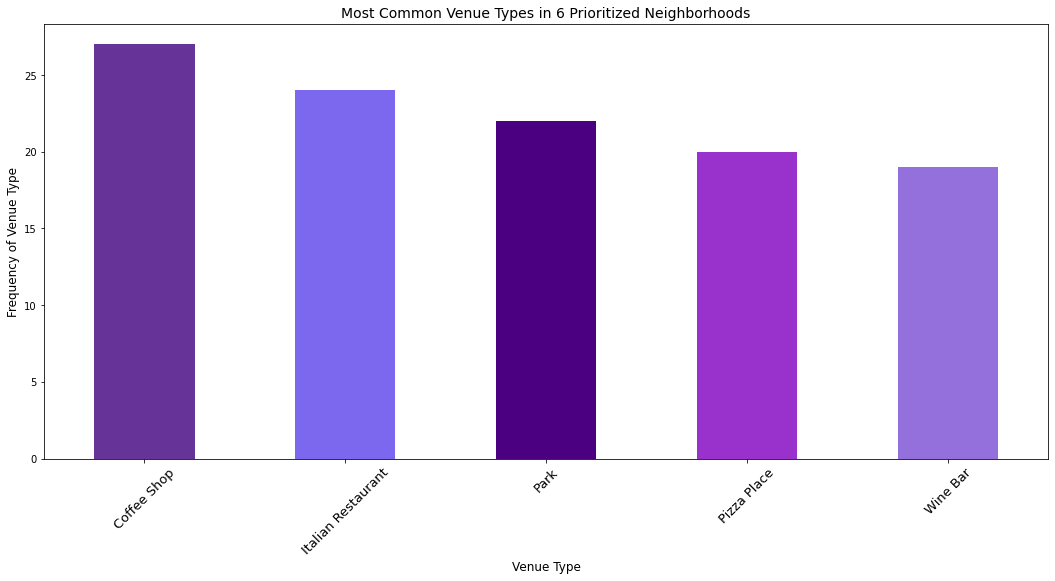

In [30]:
SF_top_venues = SF_venues.groupby('Venue Category', as_index = False).count().sort_values('Neighborhood', ascending = False).head(5)
SF_top_venues = SF_top_venues[['Venue Category','Neighborhood']]
SF_top_venues.rename(columns={'Neighborhood': 'Frequency'}, inplace = True)
SF_top_venues.plot.bar(x='Venue Category', y='Frequency', legend = None, title = "Most common venue types in 6 prioritized neighborhoods", rot= 45, figsize = (18, 8), color=['rebeccapurple','mediumslateblue','indigo','darkorchid','mediumpurple'])
plt.ylabel('Frequency of Venue Type', fontsize=12)
plt.xticks(fontsize=13)
plt.xlabel('Venue Type', fontsize=12)
plt.title('Most Common Venue Types in 6 Prioritized Neighborhoods', fontsize = 14)
plt.show()

In [31]:
# one hot encoding
SF_onehot = pd.get_dummies(SF_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
SF_onehot['Neighborhood'] = SF_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [SF_onehot.columns[-1]] + list(SF_onehot.columns[:-1])
SF_onehot = SF_onehot[fixed_columns]

SF_onehot.head()

,Neighborhood,Accessories Store,African Restaurant,Alternative Healer,American Restaurant,Antique Shop,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beer Bar,Beer Garden,Bike Shop,Board Shop,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Café,Camera Store,Candy Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Elementary School,Event Space,Field,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Truck,Forest,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gastropub,Gay Bar,German Restaurant,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Hill,Historic Site,History Museum,Hot Dog Joint,Hotel,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Library,Liquor Store,Lounge,Mac & Cheese Joint,Marijuana Dispensary,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle School,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Mountain,Movie Theater,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Noodle House,Opera House,Optical Shop,Organic Grocery,Other Nightlife,Outdoor Sculpture,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Restaurant,Russian Restaurant,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Smoothie Shop,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Tiki Bar,Toy / Game Store,Track,Trail,Train,Tree,Tuscan Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,Sunset/Parkside,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Sunset/Parkside,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Sunset/Parkside,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Sunset/Parkside,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [32]:
SF_onehot.shape

(741, 192)

In [33]:
# Group togehter the data
SF_grouped = SF_onehot.groupby('Neighborhood').mean().reset_index()
print(SF_grouped.shape)
SF_grouped

(9, 192)


,Neighborhood,Accessories Store,African Restaurant,Alternative Healer,American Restaurant,Antique Shop,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beer Bar,Beer Garden,Bike Shop,Board Shop,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Café,Camera Store,Candy Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Elementary School,Event Space,Field,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Truck,Forest,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gastropub,Gay Bar,German Restaurant,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Hill,Historic Site,History Museum,Hot Dog Joint,Hotel,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Library,Liquor Store,Lounge,Mac & Cheese Joint,Marijuana Dispensary,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle School,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Mountain,Movie Theater,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Noodle House,Opera House,Optical Shop,Organic Grocery,Other Nightlife,Outdoor Sculpture,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Restaurant,Russian Restaurant,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Smoothie Shop,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Tiki Bar,Toy / Game Store,Track,Trail,Train,Tree,Tuscan Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,Castro/Upper Market,0.00,0.00,0.00,0.010000,0.000000,0.01,0.000000,0.010000,0.01,0.00,0.000000,0.000000,0.00,0.020000,0.000000,0.000000,0.000000,0.00,0.01,0.00,0.000000,0.010000,0.00,0.000000,0.010000,0.010000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.01,0.01,0.00,0.000000,0.00,0.00,0.00,0.010000,0.060000,0.00,0.01,0.000000,0.000000,0.000000,0.00,0.00,0.01,0.020000,0.020000,0.000000,0.010000,0.000000,0.02,0.000000,0.01,0.00,0.000000,0.00,0.000000,0.000000,0.01,0.000000,0.00,0.000000,0.000000,0.010000,0.000000,0.00,0.000000,0.01,0.00,0.08,0.00,0.010000,0.000000,0.000000,0.020000,0.010000,0.010000,0.000000,0.00,0.00,0.020000,0.01,0.01,0.01,0.00,0.00,0.010000,0.020000,0.01,0.000000,0.000000,0.010000,0.020000,0.00,0.01,0.00,0.00,0.000000,0.00,0.00,0.010000,0.00,0.000000,0.00,0.000000,0.00,0.020000,0.01,0.010000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.01,0.000000,0.00,0.010000,0.040000,0.00,0.000000,0.00,0.01,0.00,0.00,0.00,0.040000,0.00,0.00,0.000000,0.02,0.000000,0.01,0.010000,0.000000,0.01,0.01,0.000000,0.000000,0.01,0.000000,0.000000,0.000000,0.000000,0.00,0.020000,0.01,0.01,0.00,0.020000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.01,0.00,0.00,0.01,0.010000,0.01,0.00,0.000000,0.000000,0.000000,0.030000,0.00,0.000000,0.000000,0.00,0.010000,0.000000,0.000000,0.00,0

In [34]:
#print each neighborhood with the top 5 most common venues
num_top_venues = 5

for hood in SF_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = SF_grouped[SF_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Castro/Upper Market----
                     venue  freq
0                  Gay Bar  0.08
1              Coffee Shop  0.06
2  New American Restaurant  0.04
3                     Park  0.04
4          Thai Restaurant  0.03


----Chinatown----
                venue  freq
0  Italian Restaurant  0.08
1  Chinese Restaurant  0.06
2         Pizza Place  0.06
3   French Restaurant  0.04
4                Café  0.04


----Hayes Valley----
                     venue  freq
0                 Wine Bar  0.05
1        French Restaurant  0.04
2  New American Restaurant  0.03
3           Clothing Store  0.03
4             Cocktail Bar  0.03


----Marina----
                  venue  freq
0  Gym / Fitness Center  0.05
1    Italian Restaurant  0.04
2                  Park  0.03
3        Sandwich Place  0.03
4              Wine Bar  0.03


----Nob Hill----
                venue  freq
0  Italian Restaurant  0.06
1       Grocery Store  0.04
2    Sushi Restaurant  0.04
3            Wine Bar  0.04
4        

In [35]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [36]:
import numpy as np
#Forgot to do this...smh lol

In [37]:
num_top_venues = 30

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = SF_grouped['Neighborhood']

for ind in np.arange(SF_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(SF_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue,26th Most Common Venue,27th Most Common Venue,28th Most Common Venue,29th Most Common Venue,30th Most Common Venue
0,Castro/Upper Market,Gay Bar,Coffee Shop,New American Restaurant,Park,Thai Restaurant,Indian Restaurant,Japanese Restaurant,Hill,Sandwich Place,Dog Run,Dessert Shop,Deli / Bodega,Seafood Restaurant,Grocery Store,Bakery,Wine Bar,Mediterranean Restaurant,Pet Store,Juice Bar,Gym,Gym / Fitness Center,Nail Salon,Museum,Historic Site,Italian Restaurant,Mexican Restaurant,Men's Store,History Museum,Hot Dog Joint,Ice Cream Shop
1,Chinatown,Italian Restaurant,Pizza Place,Chinese Restaurant,Park,French Restaurant,Coffee Shop,Cocktail Bar,Café,Hotel,Bakery,Wine Bar,Szechuan Restaurant,Bubble Tea Shop,New American Restaurant,Spa,Deli / Bodega,Beer Bar,Bar,Yoga Studio,Dive Bar,American Restaurant,Diner,Garden,Grocery Store,History Museum,Pet Store,Church,Gym / Fitness Center,Pedestrian Plaza,Wings Joint
2,Hayes Valley,Wine Bar,French Restaurant,Clothing Store,Cocktail Bar,Theater,New American Restaurant,Boutique,Coffee Shop,Pizza Place,Italian Restaurant,Spa,Food & Drink Shop,Dessert Shop,Ice Cream Shop,Concert Hall,Sushi Restaurant,Performing Arts Venue,Gym / Fitness Center,Liquor Store,Café,Mexican Restaurant,Bubble Tea Shop,Optical Shop,Bakery,Park,Gym,Mediterranean Restaurant,Kids Store,Juice Bar,Opera House
3,Marina,Gym / Fitness Center,Italian Restaurant,Sandwich Place,Cosmetics Shop,Wine Bar,French Restaurant,Park,Thai Restaurant,Diner,Mexican Restaurant,Coffee Shop,Juice Bar,Sushi Restaurant,Taco Place,Deli / Bodega,Cupcake Shop,Salad Place,New American Restaurant,American Restaurant,Burger Joint,Chinese Restaurant,Clothing Store,Newsstand,Motel,Outdoor Sculpture,Pet Store,Burmese Restaurant,Yoga Studio,Dog Run,Cycle Studio
4,Nob Hill,Italian Restaurant,Sushi Restaurant,Wine Bar,Grocery Store,Pet Store,Deli / Bodega,Bar,Park,Gym / Fitness Center,Wine Shop,Massage Studio,French Restaurant,Cocktail Bar,Pizza Place,Nail Salon,Bakery,Steakhouse,Coffee Shop,Creperie,Convenience Store,Music Store,Yoga Studio,Music Venue,Concert Hall,Newsstand,Church,Cheese Shop,Candy Store,Modern European Restaurant,Mac & Cheese Joint
5,Outer Richmond,Chinese Restaurant,Café,Thai Restaurant,Sandwich Place,Vietnamese Restaurant,Korean Restaurant,Sushi Restaurant,Playground,Indian Restaurant,Coffee Shop,Restaurant,Bakery,Dessert Shop,Japanese Restaurant,Burger Joint,Burrito Place,Pizza Place,Liquor Store,Moroccan Restaurant,Pharmacy,Deli / Bodega,Seafood Restaurant,Shanghai Restaurant,Burmese Restaurant,Ramen Restaurant,Record Shop,Russian Restaurant,Mexican Restaurant,Noodle House,Flea Market
6,Potrero Hill,Coffee Shop,Café,Park,Deli / Bodega,Grocery Store,Sandwich Place,Brewery,Food Truck,Burger Joint,Bar,Sushi Restaurant,Chinese Restaurant,Breakfast Spot,Mexican Restaurant,Art Gallery,Liquor Store,Cosmetics Shop,Convenience Store,Food,Bus Line,Cocktail Bar,Peruvian Restaurant,Mediterranean Restaurant,Mac & Cheese Joint,Martial Arts School,Playground,Pizza Place,French Restaurant,Gym / Fitness Center,Dive Bar
7,Sunset/Parkside,Chinese Restaurant,Dim Sum Restaurant,Playground,Japanese Restaurant,Pharmacy,Elementary School,Bus Station,Bus Stop,Sandwich Place,Middle School,Field,Pool,Baseball Field,Pizza Place,Donut Shop,Coffee Shop,Cosmetics Shop,Dessert Shop,Brewery,Bubble Tea Shop,Ice Cream Shop,Vietnamese Restaurant,Gym,Tennis Court,Bar,Bakery,Bank,Hardware Store,German 

### 3. K-Means Clustering and SciPy Dendrogram

Here, we'll be using K-Means clustering to group together and refine the data. \
Below is an introduction to SciPy toolkit with a Hierarchial Dendrogram. 

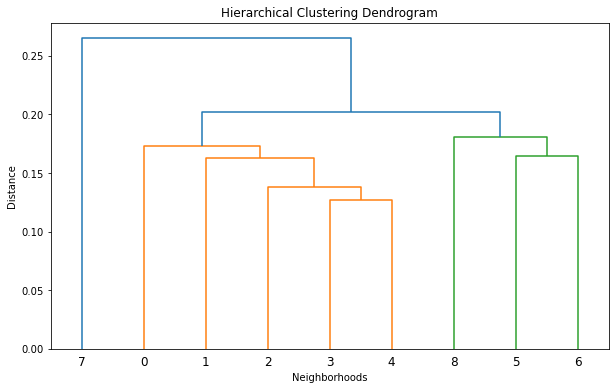

In [38]:
import scipy.cluster.hierarchy as shc

data = SF_grouped.iloc[:,3:]
plt.figure(figsize=(10, 6))   
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Neighborhoods')
plt.ylabel('Distance')
plt.axhline(y=20, c='k')
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [39]:
# set number of clusters
kclusters = 3

SF_grouped_clustering = SF_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(SF_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 2, 2, 2, 2, 0, 2, 1, 2], dtype=int32)

In [40]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels 4', kmeans.labels_)
SF_merged = SFN2
SF_merged = SF_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

In [41]:
#also including the number of bars and restaurants that each neighborhood has in its top 10 most popular spots.
SF_merged["Bars and Restaurants"] = ""
SF_merged.loc[SF_merged.Neighborhood == 'Sunset/Parkside', 'Bars and Restaurants'] = .37
SF_merged.loc[SF_merged.Neighborhood == 'Outer Richmond', 'Bars and Restaurants'] = .6
SF_merged.loc[SF_merged.Neighborhood == 'Marina', 'Bars and Restaurants'] = .67
SF_merged.loc[SF_merged.Neighborhood == 'Castro/Upper Market', 'Bars and Restaurants'] = .37
SF_merged.loc[SF_merged.Neighborhood == 'West of Twin Peaks', 'Bars and Restaurants'] = .5
SF_merged.loc[SF_merged.Neighborhood == 'Hayes Valley', 'Bars and Restaurants'] = .5
SF_merged



,Neighborhood,Businesses,Crimes,Coordinates,Latitude,Longitude,Cluster Labels 4,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue,26th Most Common Venue,27th Most Common Venue,28th Most Common Venue,29th Most Common Venue,30th Most Common Venue,Bars and Restaurants
0,Sunset/Parkside,3372,10682,"(37.751616, -122.490810)",37.751616,-122.490810,1,Chinese Restaurant,Dim Sum Restaurant,Playground,Japanese Restaurant,Pharmacy,Elementary School,Bus Station,Bus Stop,Sandwich Place,Middle School,Field,Pool,Baseball Field,Pizza Place,Donut Shop,Coffee Shop,Cosmetics Shop,Dessert Shop,Brewery,Bubble Tea Shop,Ice Cream Shop,Vietnamese Restaurant,Gym,Tennis Court,Bar,Bakery,Bank,Hardware Store,German Restaurant,Dumpling Restaurant,0.37
1,Castro/Upper Market,2341,11444,"(37.762932, -122.435395)",37.762932,-122.435395,2,Gay Bar,Coffee Shop,New American Restaurant,Park,Thai Restaurant,Indian Restaurant,Japanese Restaurant,Hill,Sandwich Place,Dog Run,Dessert Shop,Deli / Bodega,Seafood Restaurant,Grocery Store,Bakery,Wine Bar,Mediterranean Restaurant,Pet Store,Juice Bar,Gym,Gym / Fitness Center,Nail Salon,Museum,Historic Site,Italian Restaurant,Mexican Restaurant,Men's Store,History Museum,Hot Dog Joint,Ice Cream Shop,0.37
2,Marina,2281,9553,"(37.801406, -122.439718)",37.801406,-122.439718,2,Gym / Fitness Center,Italian Restaurant,Sandwich Place,Cosmetics Shop,Wine Bar,French Restaurant,Park,Thai Restaurant,Diner,Mexican Restaurant,Coffee Shop,Juice Bar,Sushi Restaurant,Taco Place,Deli / Bodega,Cupcake Shop,Salad Place,New American Restaurant,American Restaurant,Burger Joint,Chinese Restaurant,Clothing Store,Newsstand,Motel,Outdoor Sculpture,Pet Store,Burmese Restaurant,Yoga Studio,Dog Run,Cycle Studio,0.67
3,Outer Richmond,2161,8352,"(37.780001, -122.490229)",37.780001,-122.490229,0,Chinese Restaurant,Café,Thai Restaurant,Sandwich Place,Vietnamese Restaurant,Korean Restaurant,Sushi Restaurant,Playground,Indian Restaurant,Coffee Shop,Restaurant,Bakery,Dessert Shop,Japanese Restaurant,Burger Joint,Burrito Place,Pizza Place,Liquor Store,Moroccan Restaurant,Pharmacy,Deli / Bodega,Seafood Restaurant,Shanghai Restaurant,Burmese Restaurant,Ramen Restaurant,Record Shop,Russian Restaurant,Mexican Restaurant,Noodle House,Flea Market,0.6
4,West of Twin Peaks,2003,7378,"(37.739871, -122.460106)",37.739871,-122.460106,2,Pizza Place,Burger Joint,Italian Restaurant,Wine Bar,Park,Coffee Shop,Sandwich Place,Pharmacy,Mexican Restaurant,Brazilian Restaurant,Diner,Dive Bar,Bookstore,Nail Salon,Shipping Store,Breakfast Spot,Frozen Yogurt Shop,Burrito Place,Playground,Mediterranean Restaurant,Café,Monument / Landmark,Gym / Fitness Center,Movie Theater,Toy / Game Store,Gym,Grocery Store,Greek Restaurant,Music Store,Tree,0.5
5,Chinatown,1969,6895,"(37.7947817, -122.4115304)",37.7947817,-122.4115304,2,Italian Restaurant,Pizza Place,Chinese Restaurant,Park,French Restaurant,Coffee Shop,Cocktail Bar,Café,Hotel,Bakery,Wine Bar,Szechuan Restaurant,Bubble Tea Shop,New American Restaurant,Spa,Deli / Bodega,Beer Bar,Bar,Yoga Studio,Dive Bar,American Restaurant,Diner,Garden,Grocery Store,History Museum,Pet Store,Church,Gym / Fitness Center,Pedestrian Plaza,Wings Joint,
6,Potrero Hill,1905,6381,"(37.7582657, -122.4013887)",37.7582657,-122.4013887,2,Coffee Shop,Café,Park,Deli / Bodega,Grocery Store,Sandwich Place,Brewery,Food Truck,Burger Joint,Bar,Sushi Restaurant,Chinese Restaurant,Breakfast Spot,Mexican Restaurant,Art Gallery,Liquor Store,Cosmetics Shop,Convenience Sto

### Map the Clusters

In [42]:

address = 'San Francisco, California'

geolocator = Nominatim(user_agent="SF_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of San Francisco are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of San Francisco are 37.7790262, -122.4199061.


In [ ]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(.7, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# # add markers to the map
markers_colors = []
for lat, lon, poi, cluster, bars in zip(SF_merged['Latitude'], SF_merged['Longitude'], SF_merged['Neighborhood'], SF_merged['Cluster Labels'], SF_merged['Bars and Restaurants']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=35*bars,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=1).add_to(map_clusters)
       
map_clusters

## 4. Results and Discussion

#### 4A. Best Spot to Open a Restaurant

Through interpretation of the data, we can infer the top 3 neighborhoods to open a new \
restaurant can be in Sunset/Parkside, Castro/Upper Market, and Marina. Depending on the type \
or cuisine that is offered, the client has a variety of options to choose from if they are to \
either compete against other restaurants of the same cuisine, or to offer something new in a neighborhood \
not seen before. 

#### 4B. Discussion

For the project, we were able to pull business and crime data from the City of San Francisco \
and apply it to find the best area in the city to open a new fine dining restaurant for a client.\
After extracting and cleaning the data, we were able to manipulate the data into necessary \
dataframes as a means of organization and classifcation for further analysis. \
Coordinates for neighborhoods within the city were extracted used GeoPy. However, \
these coordinates were erratic and not entirely indicative of actual coordinates. \
This could've been user error, errors within the code, or some other limitations. Instead, \
Google Maps was used to find the remainder of these coordinates. \
The Foursquare API was accessed to determine frequency of venues in different neighborhoods \
and was clustered using K-Means. An agglomorative cluster was partially developed using \
SciPy and a dendrogram was created. Finally, a folium map was generated to show this \
frequency and assist in determining the best location for opening a new restaurant. 

## 5. Conclusion

This project requried further research and understanding on how to read Python code. I believe it's \
more important on understanding what the code is and the process of what occurs, rather than the code \
itself. This was my first foray into the world of data and data science, so I understand this project \
may seem quite amateur to esteemed data science professionals. The tools used in this project were just \
a few of the many that can be found across Python's libraries and modules. \
I would need to delve more into the field of data science and refine these new skills but it's \
exciting to learn something new!